# **KMeans**

KMeans adalah satu metode unsupervised learning pada machine learning. Metode ini menentukan jumlah cluster sesuai dengan jumlah  yang dipilih.

Pada modul jobsheet ini, kita akan langsung mempraktikkan pembuatan model KMeans dengan menggunakan python. Untuk modul pertama ini, kita akan menggunakan contoh kasus yang sederhana, yaitu dengan menggunakan dataset iris. Sedangkan untuk modul kedua, kita akan melakukan clustering dengan lebih advance, yaitu reduksi warna dengan data gambar

In [1]:
# Import Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [2]:
# Load Data
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/drive/MyDrive/Machine Learning/Week 07/Praktikum 1/Iris.csv')

df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
# Seleksi Fitur

X = df.iloc[:, 1:-1]
y = df.iloc[:, -1]

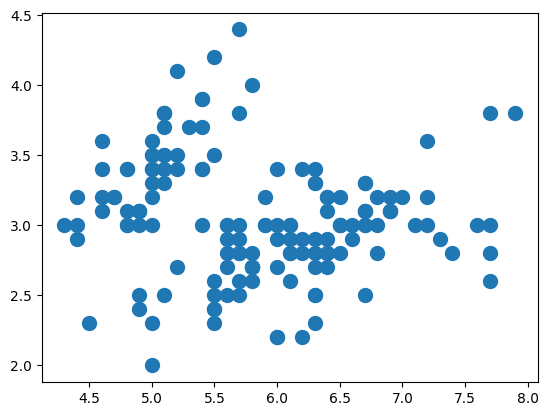

In [5]:
# Plot Data
# Karena data 4 dimensi, maka akan kita coba
# plot cluster berdasarkan Sepal Length dan Sepal Width  saja

plt.scatter(X.iloc[:, 0], X.iloc[:, 1], s = 100)

In [6]:
# Buat Model KMeans
# Kali ini kita coba menggunakan k=2 - anggap saja kita tidak tahu jumlah label ada 3 :)

from sklearn.cluster import KMeans

# Inisiasi obyek KMeans
cl_kmeans = KMeans(n_clusters=2, n_init=8)

# Fit dan predict model
y_kmeans = cl_kmeans.fit_predict(X)

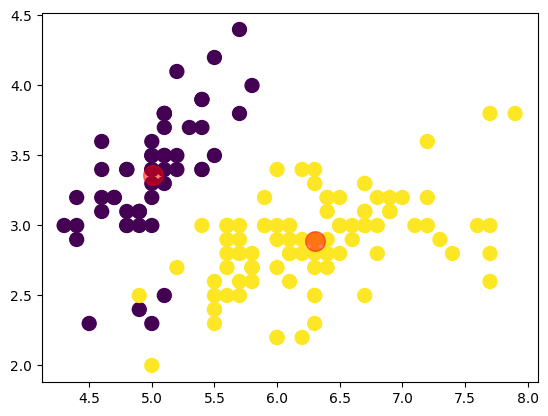

In [7]:
# Plot hasi cluster berdasarkan Sepal Length dan Sepal Width
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], s = 100, c=y_kmeans)

# Plot centroid
centers = cl_kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5)

In [8]:
# Cek Nilai SSE
print(f'Nilai SSE: {cl_kmeans.inertia_}')

Nilai SSE: 152.36870647733906


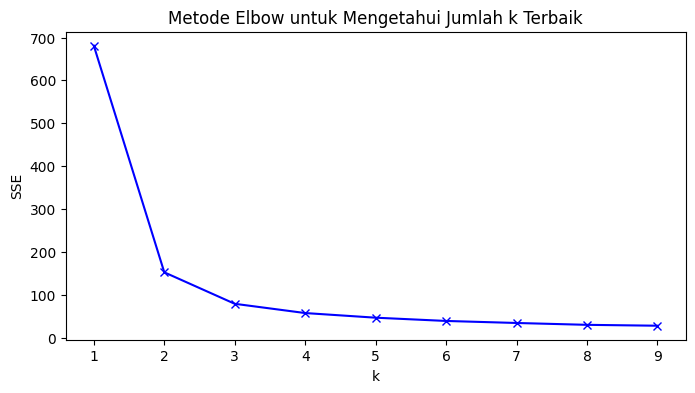

In [11]:
# Implementasi Metode Elbow
# Elbow saat ini kurang diminati

# List nilai SSE
sse = []

# Cari k terbaik dari 1-10
K = range(1,10)

# Cek nilai SSE setiap k
for k in K:
 kmeanModel = KMeans(n_clusters=k, n_init=8)
 kmeanModel.fit(X)
 sse.append(kmeanModel.inertia_)


# Plotting the distortions
plt.figure(figsize=(8,4))
plt.plot(K, sse, "bx-")
plt.xlabel("k")
plt.ylabel("SSE")
plt.title("Metode Elbow untuk Mengetahui Jumlah k Terbaik")
plt.show()


In [25]:
# Implementasi Metode Silhouette
# Silhouette lebih diminati

from sklearn.metrics import silhouette_score, silhouette_samples

# list nilai silhouette
silhouette_scores = []

# Cari k terbaik dari 2 hingga 10
# minimal 2 klaster pada Silhouette Score
K = range(2,11)

# Cek nilai SSE setiap k
for k in K:
  kmeans = KMeans(n_clusters=k, n_init=8)
  kmeans.fit(X)
  score = silhouette_score(X, kmeans.labels_)
  silhouette_scores.append(score)

# Plotting the distortions
# plt.figure(figsize=(8,4))
# plt.plot(K, silhouette_scores, "bx-")
# plt.xlabel("k")
# plt.ylabel("SSE")
# plt.title("Metode Elbow untuk Mengetahui Jumlah k Terbaik")
# plt.show()


In [26]:
# mencari jumlah klaster optimal
# menambahkan 2 ke indeks maksimum untuk mendapatkan jumlah klaster aktual
optimal_k = silhouette_scores.index(max(silhouette_scores)) + 2

# train dengan klaster optimal
kmeans = KMeans(n_clusters=optimal_k, random_state=0).fit(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


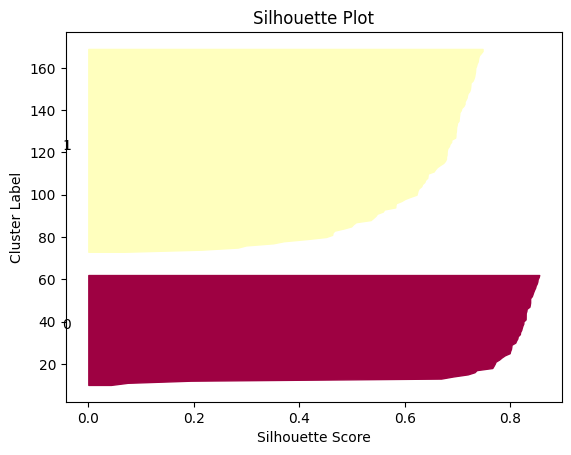

In [40]:
# menghitung Silhouette Score untuk setiap sampel
silhouette_values = silhouette_samples(X, kmeans.labels_)

# plot Silhouette Score
y_lower = 10
for i in range(optimal_k):
    cluster_silhouette_values = silhouette_values[kmeans.labels_ == i]

    cluster_silhouette_values.sort()

    size_cluster_i = cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = plt.colormaps.get_cmap("Spectral")(float(i) / optimal_k)
    plt.fill_betweenx(np.arange(y_lower, y_upper), 0, cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=1)

    # label silhouette plot
    plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

    # y_lower untuk plot selanjutnya
    y_lower = y_upper + 10

plt.title("Silhouette Plot")
plt.xlabel("Silhouette Score")
plt.ylabel("Cluster Label")
plt.show()

In [ ]:
# Cek Nilai SSE setiap k
for idx, sse_val in enumerate(sse, start=1):
    print(f'k={idx}; SSE={sse_val}')

k=1; SSE=680.8244000000001
k=2; SSE=152.36870647733906
k=3; SSE=78.940841426146
k=4; SSE=57.317873214285704
k=5; SSE=46.53558205128205
k=6; SSE=38.930963049671746
k=7; SSE=34.27727508361204
k=8; SSE=29.955568877177583
k=9; SSE=28.189189567890367
